# Import libraries 

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [77]:
import sklearn.model_selection as sm 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler #fixed import
from sklearn.naive_bayes import ComplementNB
from mlxtend.evaluate import bias_variance_decomp


# Read Dataset

In [3]:
df=pd.read_csv("heart_2020_cleaned.csv")
df.head(10)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
df.shape

(319795, 18)

Our sample data has 319,795 different person's 18 different type of medical information one of which is our target hearth disease 

# Explarotary Data Analysis - Preprocessing and Feature Engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

To look closer to the data we check the column names which represent the medical information of the people and the data type of the column that shows us if the data is categorical or numeric. We did not see any null values here but we need to also check specifically if there is any other problematic variable

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Here we once again show that there is no null value in any column

In [7]:
# defining the unique value for each column
for col in df:
    print(df[col].unique())

['No' 'Yes']
[16.6  20.34 26.58 ... 62.42 51.46 46.56]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


Here above we can see the unique values for each column. This will be helpfull to detect if there is any non-sense value that will effect our classification results

In [8]:
# duplication check 
df.duplicated().value_counts() 


False    301717
True      18078
dtype: int64

Here we are checking the data if there is any duplication and see that there are 18078 people have similar results, considering the data it is acceptable and logical

In [9]:
df.describe(include=['O']) #categorical variables

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


Here above we check each categorical variable with its total number of unique categories and the frequency of the most seen value

### Feature Engineering and Preprocessing
Here additional to EDA we also use some data pre processing in order to prepare data set for classification training stage, I will tag the preprocessing items below for each preprocessing step

Binary one hot encoding the target column HeartDisease **#Feature Engineering and Preprocessing**

In [10]:
df["HeartDisease"] = df["HeartDisease"].replace({"No": 0, "Yes": 1})
df["HeartDisease"].unique()

array([0, 1])

**Feature Importance 1**

In [11]:
df.corr() # CORRELATION

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease,1.000000,0.051803,0.170721,0.028591,0.008327
BMI,0.051803,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.170721,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.028591,0.064131,0.287987,1.000000,-0.119717
SleepTime,0.008327,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

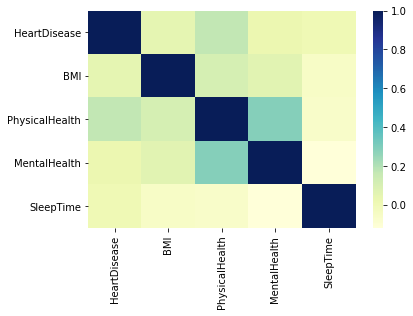

In [12]:
 sns.heatmap(df.corr(),cmap="YlGnBu")

**Physical health** is showing a bit higher correlation with hearth disease compare to other numerical features. It is another subject that pyshical health shows high correlation with mental health, however, it is another study

Since some of the machine learning algorithms in sckitlearn library can not handle the categorical values, we are dummyfying each categorical value  **#Feature Engineering and Preprocessing**

In [13]:
# dummification : 
X= pd.get_dummies(df)
X

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,20.34,0.0,0.0,7.0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,26.58,20.0,30.0,8.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,24.21,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
4,0,23.71,28.0,0.0,8.0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,0.0,6.0,0,1,1,0,1,...,1,0,0,0,0,1,1,0,1,0
319791,0,29.84,0.0,0.0,5.0,0,1,1,0,1,...,0,0,0,1,0,1,1,0,1,0
319792,0,24.24,0.0,0.0,6.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
319793,0,32.81,0.0,0.0,12.0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0


<AxesSubplot:>

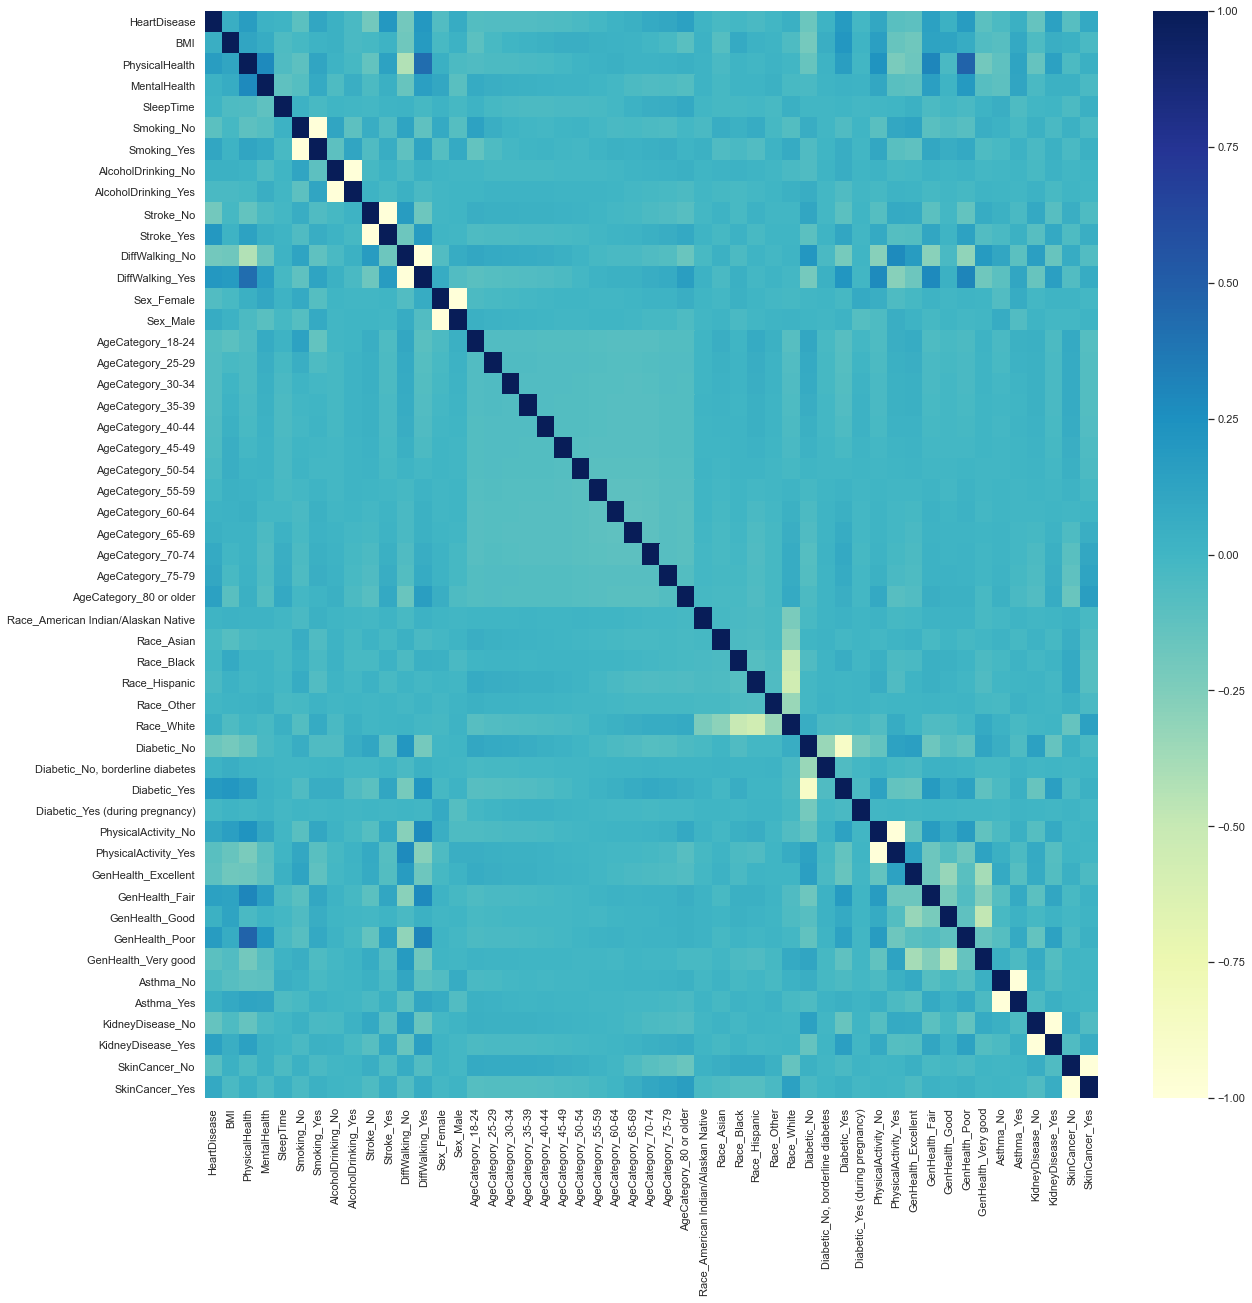

In [14]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(X.corr(),cmap="YlGnBu")

**FEATURE IMPORTANCE 2**

Above we can see all the columns and their correlation results with heartdisease. Besides the physical health there is also some relation with poor genetic, having stroke before and difficulty to walk or climbing stairs

**#Feature Engineering and Preprocessing**

<br>

distinguish the dependent and independent variables

In [15]:
y = X[['HeartDisease']]
X= X.drop('HeartDisease', axis=1)


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 50 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  319795 non-null  float64
 1   PhysicalHealth                       319795 non-null  float64
 2   MentalHealth                         319795 non-null  float64
 3   SleepTime                            319795 non-null  float64
 4   Smoking_No                           319795 non-null  uint8  
 5   Smoking_Yes                          319795 non-null  uint8  
 6   AlcoholDrinking_No                   319795 non-null  uint8  
 7   AlcoholDrinking_Yes                  319795 non-null  uint8  
 8   Stroke_No                            319795 non-null  uint8  
 9   Stroke_Yes                           319795 non-null  uint8  
 10  DiffWalking_No                       319795 non-null  uint8  
 11  DiffWalking_Y

In [17]:
X.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
BMI,1.000000,0.109788,0.064131,-0.051822,-0.023118,0.023118,0.038816,-0.038816,-0.019733,0.019733,...,0.127364,0.118047,0.062501,-0.065954,-0.092345,0.092345,-0.050768,0.050768,0.033644,-0.033644
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,-0.115352,0.115352,0.017254,-0.017254,-0.137014,0.137014,...,0.303773,-0.037663,0.471919,-0.196462,-0.117907,0.117907,-0.142197,0.142197,-0.041700,0.041700
MentalHealth,0.064131,0.287987,1.000000,-0.119717,-0.085157,0.085157,-0.051282,0.051282,-0.046467,0.046467,...,0.151321,0.013353,0.192079,-0.089956,-0.114008,0.114008,-0.037281,0.037281,0.033412,-0.033412
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,0.030336,-0.030336,0.005065,-0.005065,-0.011900,0.011900,...,-0.040923,-0.013725,-0.033074,0.019379,0.048245,-0.048245,-0.006238,0.006238,-0.041266,0.041266
Smoking_No,-0.023118,-0.115352,-0.085157,0.030336,1.000000,-1.000000,0.111768,-0.111768,0.061226,-0.061226,...,-0.095620,-0.059651,-0.086520,0.052305,0.024149,-0.024149,0.034920,-0.034920,0.033977,-0.033977
Smoking_Yes,0.023118,0.115352,0.085157,-0.030336,-1.000000,1.000000,-0.111768,0.111768,-0.061226,0.061226,...,0.095620,0.059651,0.086520,-0.052305,-0.024149,0.024149,-0.034920,0.034920,-0.033977,0.033977
AlcoholDrinking_No,0.038816,0.017254,-0.051282,0.005065,0.111768,-0.111768,1.000000,-1.000000,-0.019858,0.019858,...,0.018859,0.007808,0.017068,-0.013005,-0.002202,0.002202,-0.028280,0.028280,-0.005702,0.005702
AlcoholDrinking_Yes,-0.038816,-0.017254,0.051282,-0.005065,-0.111768,0.111768,-1.000000,1.000000,0.019858,-0.019858,...,-0.018859,-0.007808,-0.017068,0.013005,0.002202,-0.002202,0.028280,-0.028280,0.005702,-0.005702
Stroke_No,-0.019733,-0.137014,-0.046467,-0.011900,0.061226,-0.061226,-0.019858,0.019858,1.000000,-1.000000,...,-0.104983,-0.013159,-0.133641,0.069395,0.038866,-0.038866,0.091167,-0.091167,0.048116,-0.048116
Stroke_Yes,0.019733,0.137014,0.046467,0.011900,-0.061226,0.061226,0.019858,-0.019858,-1.000000,1.000000,...,0.104983,0.013159,0.133641,-0.069395,-0.038866,0.038866,-0.091167,0.091167,-0.048116,0.048116


In [18]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00
Smoking_No,319795.0,0.587523,0.492281,0.00,0.00,1.00,1.00,1.00
Smoking_Yes,319795.0,0.412477,0.492281,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking_No,319795.0,0.931903,0.251912,0.00,1.00,1.00,1.00,1.00
AlcoholDrinking_Yes,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,1.00
Stroke_No,319795.0,0.962260,0.190567,0.00,1.00,1.00,1.00,1.00
Stroke_Yes,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,1.00


Here we are going to check the boxplots to show the skewness and potential outliers.

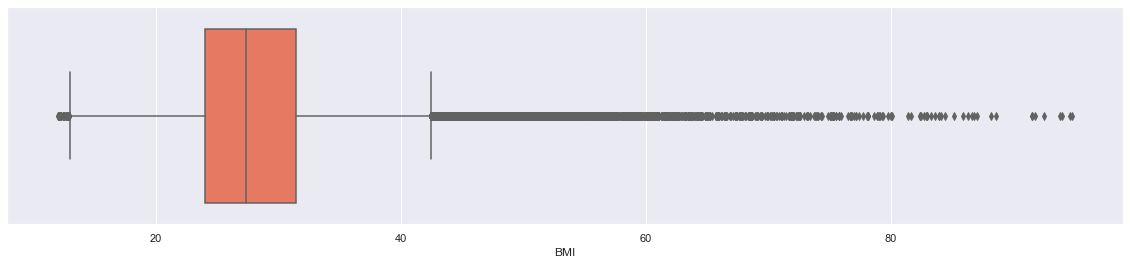

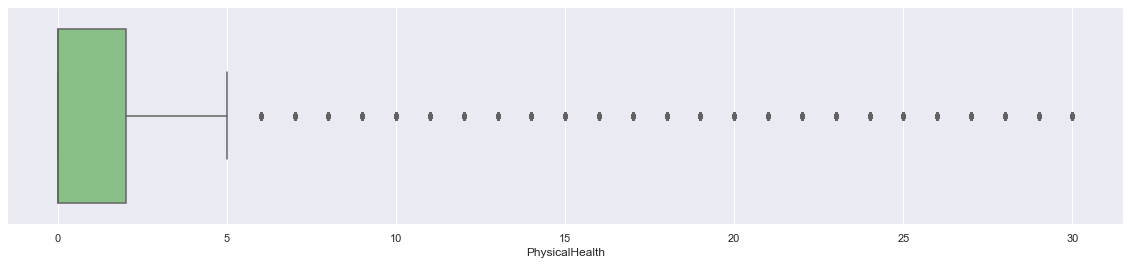

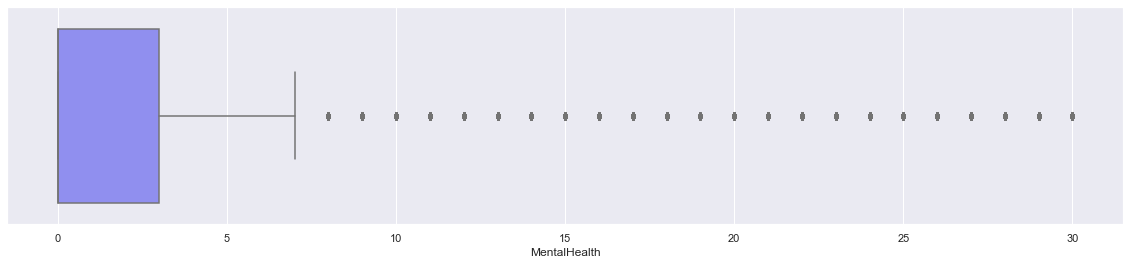

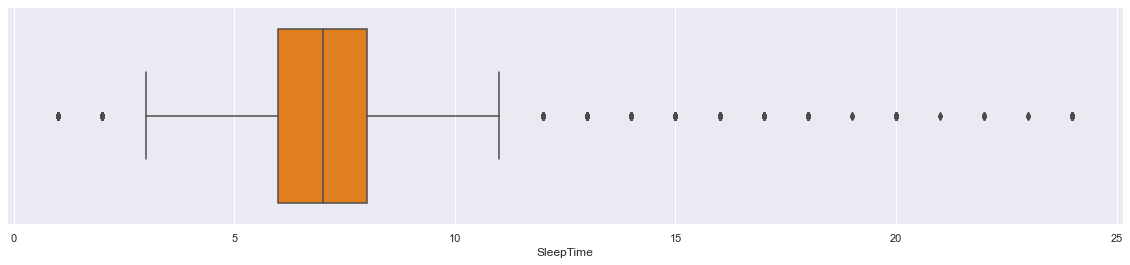

In [19]:
sns.set(rc={'figure.figsize':(20,4)})

# BOXPLOTS
ax = sns.boxplot(x="BMI", data=X,palette='Reds_r')
plt.figure()
ax = sns.boxplot(x="PhysicalHealth", data=X,palette='Accent')
plt.figure()
ax = sns.boxplot(x="MentalHealth", data=X,palette='cool')
plt.figure()
ax = sns.boxplot(x="SleepTime", data=X,palette='autumn_r')

Nearly all of them show some outliers, but especially BMI show huge outlier results. Moreover, physical and mental health columns shows right skewed structure while the BMI and sleeptime more close to show gaussian distribution

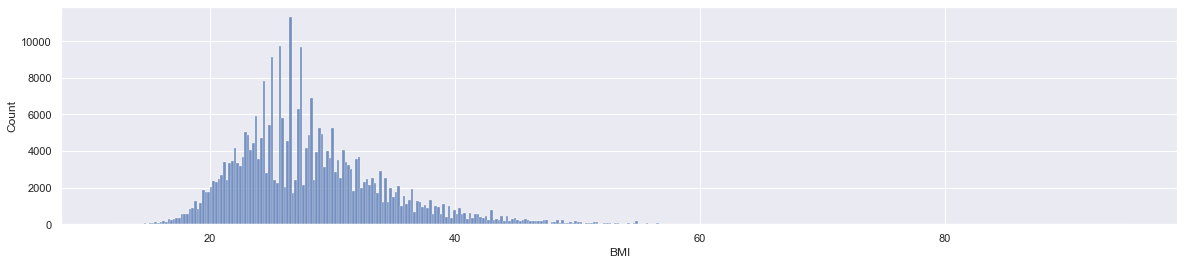

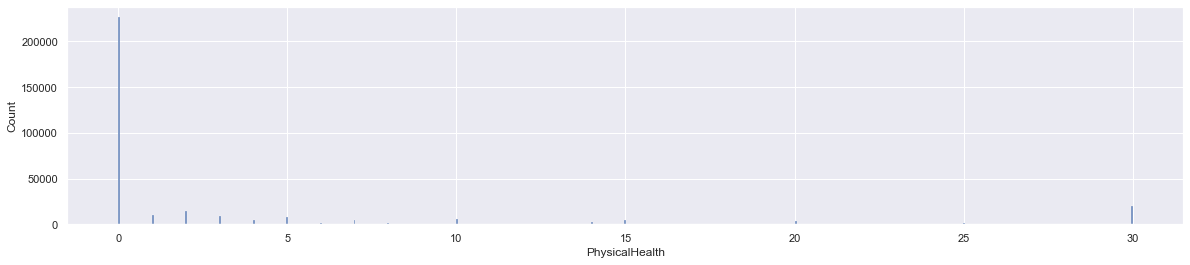

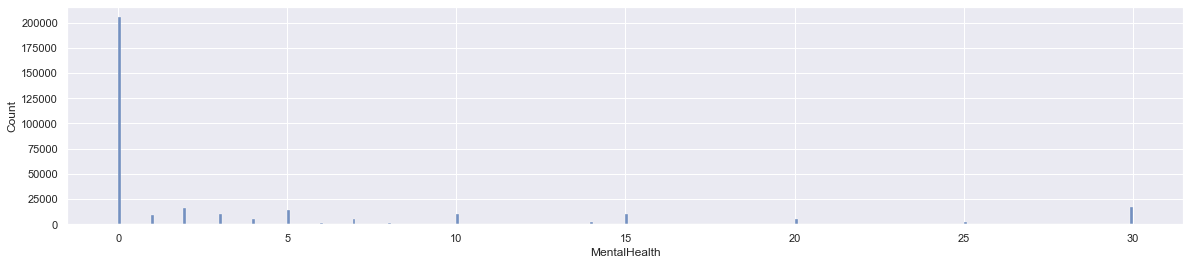

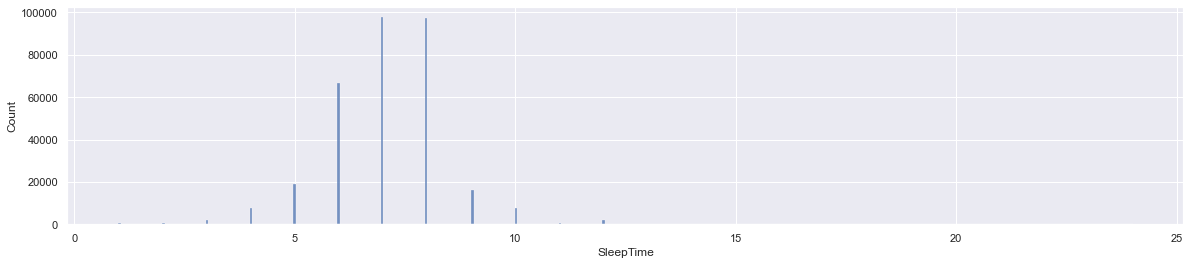

In [20]:
# HISTOGRAMS
ax = sns.histplot(x="BMI", data=X,palette='Reds_r')
plt.figure()
ax = sns.histplot(x="PhysicalHealth", data=X,palette='Accent')
plt.figure()
ax = sns.histplot(x="MentalHealth", data=X,palette='cool')
plt.figure()
ax = sns.histplot(x="SleepTime", data=X,palette='autumn_r')

# Splitting the Data into Training and Test Sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (223856, 50)
X_test: (95939, 50)
y_train: (223856, 1)
y_test: (95939, 1)


We used 30% test and 70% train data 

# Standartization 

In [22]:
robust_scaler = RobustScaler()         #Because there are high number of outliers 
X_train= robust_scaler.fit_transform(X_train)
df_sc = pd.DataFrame(X_train)
X_test=robust_scaler.transform(X_test)

# Modelling 

Here we are going with 2 approach for classification : 
    
    1. We will show the default classification results
    2. We will create a pipeline and show classification results 
    
Note : The optimization score is as stated on top : **Recall** 

##### Used ML Classification Algorithms : 
    
        - Logistic Regression 
        - Decision Tree Classifier
        -  KNN : Since our data is considerably huge, KNN O(N) notation will be not efficient, this is why we 
                   eliminate the KNN from the tried ML algorithms**   
        - SVM (Linear SVC : which is better with huge data sets)
        - Naive Bayes 
        - Random Forest 


# 1st : Default Models

In [23]:
#Model_1 LOGISTIC REGRESSION NO PARAMETER TUNNING RESULTS

LogReg_clf = LogisticRegression(random_state = 42).fit(X_train, y_train)

y_pred = LogReg_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))

result_LR = {'CLASSIFICATION_MODEL': 'LOGISTIC REGRESSION', 
             'ACCURACY':accuracy_score(y_test, y_pred),
             'PRECISION':precision_score(y_test, y_pred),
             'F1-SCORE':f1_score(y_test, y_pred),
             'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.9144456373320548
precision: 0.5258838383838383
F1_SCORE: 0.16872594693133483
RECALL: 0.10048250904704463


In [31]:
#Model_2 DECISION TREE

Tree_clf=DecisionTreeClassifier(random_state = 42 ).fit(X_train, y_train)
y_pred = Tree_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))

result_dt = {'CLASSIFICATION_MODEL':'DECISION TREE CLASSIFIER',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.863371517318296
precision: 0.2273035997283224
F1_SCORE: 0.23452464377481896
RECALL: 0.2422195416164053


In [33]:
#MODEL_3 SUPPORT VECTOR MACHINES

# Linear SVC is the model of SVM that works faster with huge data sets

SVM_clf=LinearSVC(tol=0.005, random_state = 42).fit(X_train, y_train)
y_pred = SVM_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))


result_SVM = {'CLASSIFICATION_MODEL':'SUPPORT VECTOR MACHINE CLASSIFER-LINEAR SVC',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.9146332565484319
precision: 0.5859106529209622
F1_SCORE: 0.07687105500450857
RECALL: 0.041133896260554886


In [35]:
#MODEL_4 NAIVE BAYES 

# COMPLEMENT NB which is better version of Naive Bayes in Sckit Learn for inbalanced data set 


# The NAIVE BAYES REQUIRES NON-NEGATIVE VALUES AS AN INPUT , IN ORDER TO SOLVE THAT ISSUE WE USE MIN-MAX SCALER

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

GNB_clf=ComplementNB().fit(X_train, y_train)
y_pred = GNB_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))



result_NAIVEB = {
            'CLASSIFICATION_MODEL':'NAIVE BAYES CLASSIFIER - COMPLEMETNB',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.7691449775378105
precision: 0.22977926838780127
F1_SCORE: 0.34728280089590946
RECALL: 0.710735826296743


In [37]:
#MODEL_6 RANDOM FOREST
RF_clf= RandomForestClassifier(random_state=42, n_jobs=-1)
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))


result_RANDOM_FOREST = {
            'CLASSIFICATION_MODEL':'RANDOM FOREST CLASSIFIER',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.9020314991817717
precision: 0.33130514146638274
F1_SCORE: 0.18813164032132676
RECALL: 0.1313630880579011


### RESULTS OF DEFAULT MODELS: 

In [38]:
Defaults = pd.DataFrame([result_LR,result_dt,result_SVM,result_NAIVEB,result_RANDOM_FOREST])
Defaults

,CLASSIFICATION_MODEL,ACCURACY,PRECISION,F1-SCORE,RECALL
0,LOGISTIC REGRESSION,0.914466,0.526515,0.168928,0.100603
1,DECISION TREE CLASSIFIER,0.863372,0.227304,0.234525,0.242220
2,SUPPORT VECTOR MACHINE CLASSIFER-LINEAR SVC,0.914633,0.585911,0.076871,0.041134
3,NAIVE BAYES CLASSIFIER - COMPLEMETNB,0.769145,0.229779,0.347283,0.710736
4,RANDOM FOREST CLASSIFIER,0.902031,0.331305,0.188132,0.131363


With deafult values shows us the naive bayes model gives best result so far.

<Figure size 720x216 with 0 Axes>

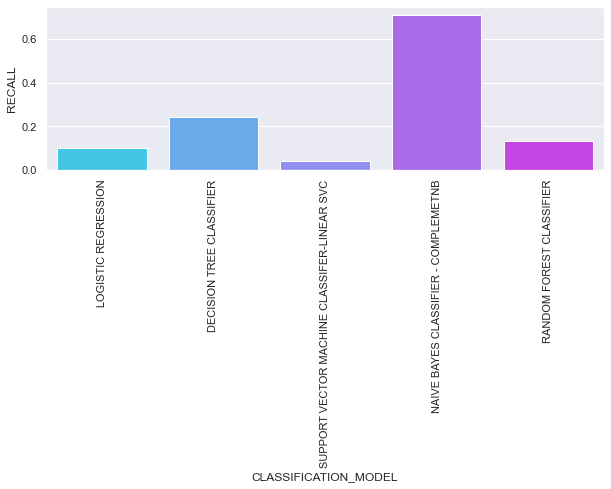

<Figure size 720x216 with 0 Axes>

In [96]:
sns.set(rc={'figure.figsize':(10,3)})
ax = sns.barplot(x='CLASSIFICATION_MODEL',y='RECALL', data=Defaults,palette='cool')
plt.xticks(rotation=90)
plt.figure()

# Pipeline and hyperparameter

#### Since our dataset is huge we use RandomizedsearchCV  instead of gridsearchCV which works much faster with big datasets

### LOGISTIC REGRESSION

In [154]:


pipeline = Pipeline([('scaler', StandardScaler()),
                     ('LogReg_clf',    LogisticRegression(class_weight = 'balanced',random_state = 42,n_jobs= -1))])

params = {'LogReg_clf__penalty': ['l1','l2','elasticnet'], 
           'LogReg_clf__tol'    : [0.005], 
           'LogReg_clf__solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
           'LogReg_clf__max_iter':[250,275,300,350,400],
          }
          
          



In [155]:
grid = RandomizedSearchCV(estimator = pipeline, param_distributions = params,random_state = 42, cv = 3, scoring = 'recall', n_jobs = -1)

grid.fit(X_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print('Classifier used           :', grid.best_estimator_,'\n')
print('Grid recall on test data:', grid.score(X_test, y_test))

Best grid parameters      : {'LogReg_clf__tol': 0.005, 'LogReg_clf__solver': 'saga', 'LogReg_clf__penalty': 'l1', 'LogReg_clf__max_iter': 250} 

Classifier used           : Pipeline(steps=[('scaler', StandardScaler()),
                ('LogReg_clf',
                 LogisticRegression(class_weight='balanced', max_iter=250,
                                    n_jobs=-1, penalty='l1', random_state=42,
                                    solver='saga', tol=0.005))]) 

Grid recall on test data: 0.7773220747889023


In [157]:
scaler = StandardScaler()         
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


LogReg_clf = grid.best_estimator_[1].fit(X_train, y_train)

y_pred = LogReg_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))

result_LR = {'CLASSIFICATION_MODEL': 'LOGISTIC REGRESSION', 
             'ACCURACY':accuracy_score(y_test, y_pred),
             'PRECISION':precision_score(y_test, y_pred),
             'F1-SCORE':f1_score(y_test, y_pred),
             'RECALL':recall_score(y_test,y_pred)
          }


ACCURACY: 0.749778505091777
precision: 0.22528317717801707
F1_SCORE: 0.34932509351114005
RECALL: 0.7773220747889023


### DESICISION TREE

In [83]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('Tree_clf',    DecisionTreeClassifier(class_weight = 'balanced', random_state = 42))])

params = {'Tree_clf__criterion': ['gini','entropy'], 
           'Tree_clf__splitter'    : ['best'], 
           'Tree_clf__max_depth' : [1,2],
           'Tree_clf__min_samples_split':[2,3,4],
           'Tree_clf__min_samples_leaf':[1,2,3],
           'Tree_clf__max_features':['int','auto', 'sqrt', 'log2']
          }
            

In [84]:
grid = RandomizedSearchCV(estimator = pipeline, param_distributions = params,random_state = 42, cv = 3, scoring = 'recall')

grid.fit(X_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print('Classifier used           :', grid.best_estimator_,'\n')
print('Grid recall on test data:', grid.score(X_test, y_test))

Best grid parameters      : {'Tree_clf__splitter': 'best', 'Tree_clf__min_samples_split': 3, 'Tree_clf__min_samples_leaf': 1, 'Tree_clf__max_features': 'sqrt', 'Tree_clf__max_depth': 1, 'Tree_clf__criterion': 'gini'} 

Classifier used           : Pipeline(steps=[('scaler', StandardScaler()),
                ('Tree_clf',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                                        max_features='sqrt',
                                        min_samples_split=3,
                                        random_state=42))]) 

Grid recall on test data: 0.9425814234016888


In [29]:

Tree_clf=grid.best_estimator_[1].fit(X_train, y_train)
y_pred = Tree_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))

result_dt = {'CLASSIFICATION_MODEL':'DECISION TREE CLASSIFIER',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.28489978006858524
precision: 0.10289160434004004
F1_SCORE: 0.18553078329415676
RECALL: 0.9425814234016888


We see here that the recall value has reached a value of 94.2%. This means we detect the people who have hearth disease with 94.2%.

### SUPPORT VECTOR MACHINES

In [68]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('SVM_clf',    LinearSVC(class_weight='balanced'))])

params = {'SVM_clf__penalty': ['l1','l2'], 
           'SVM_clf__C':[1],
           'SVM_clf__tol' : [0.001,0.0001], 
           'SVM_clf__max_iter' : [1600,2000],
           
          }

In [69]:
grid = RandomizedSearchCV(estimator = pipeline, param_distributions = params,random_state = 42, cv = 3, scoring = 'recall')

grid.fit(X_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print('Classifier used           :', grid.best_estimator_,'\n')
print('Grid recall on test data:', grid.score(X_test, y_test))

Best grid parameters      : {'SVM_clf__tol': 0.001, 'SVM_clf__penalty': 'l2', 'SVM_clf__max_iter': 2000, 'SVM_clf__C': 1} 

Classifier used           : Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM_clf',
                 LinearSVC(C=1, class_weight='balanced', max_iter=2000,
                           tol=0.001))]) 

Grid recall on test data: 0.7751507840772014


In [70]:
scaler = StandardScaler()         
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


SVM_clf=grid.best_estimator_[1].fit(X_train, y_train)
y_pred = SVM_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))


result_SVM = {'CLASSIFICATION_MODEL':'SUPPORT VECTOR MACHINE CLASSIFER-LINEAR SVC',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.7501537435245312
precision: 0.22520154223624256
F1_SCORE: 0.3489951113525258
RECALL: 0.7750301568154403


### NAIVE BAYES 

In [86]:
pipeline = Pipeline([('scaler', MinMaxScaler()), # since we use compliment NB we need minmax scaler
                     ('NB_clf',  ComplementNB())]) # alpha value gives smoothing internally for unbalanced dataset

params = {'NB_clf__alpha': [0, 0.01,0.1,0.5,1], 
        
           
          }

In [87]:
grid = RandomizedSearchCV(estimator = pipeline, param_distributions = params,random_state = 42, cv = 3, scoring = 'recall')

grid.fit(X_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print('Classifier used           :', grid.best_estimator_,'\n')
print('Grid recall on test data:', grid.score(X_test, y_test))

Best grid parameters      : {'NB_clf__alpha': 0} 

Classifier used           : Pipeline(steps=[('scaler', MinMaxScaler()), ('NB_clf', ComplementNB(alpha=0))]) 

Grid recall on test data: 0.710735826296743


In [89]:
scaler = MinMaxScaler()         
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

GNB_clf=grid.best_estimator_[1].fit(X_train, y_train)
y_pred = GNB_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))



result_NAIVEB = {
            'CLASSIFICATION_MODEL':'NAIVE BAYES CLASSIFIER - COMPLEMETNB',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.7691449775378105
precision: 0.22977926838780127
F1_SCORE: 0.34728280089590946
RECALL: 0.710735826296743


### RANDOM FOREST

In [90]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('RF_clf', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight = 'balanced' ))])

params = {'RF_clf__criterion': ['gini','entropy'], 
           'RF_clf__n_estimators' : [120,150,170], 
           'RF_clf__max_features' : ['auto', 'sqrt', 'log2'],
           'RF_clf__max_depth':     [8,10,12],
           'RF_clf__min_samples_leaf': [1,2,3]
           
          }

In [91]:
grid = RandomizedSearchCV(estimator = pipeline, param_distributions = params,random_state = 42, cv = 3, scoring = 'recall')


grid.fit(X_train, y_train)
print('Best grid parameters      :', grid.best_params_, '\n')
print('Classifier used           :', grid.best_estimator_,'\n')
print('Grid recall on test data:', grid.score(X_test, y_test))

Best grid parameters      : {'RF_clf__n_estimators': 170, 'RF_clf__min_samples_leaf': 1, 'RF_clf__max_features': 'auto', 'RF_clf__max_depth': 10, 'RF_clf__criterion': 'gini'} 

Classifier used           : Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=170, n_jobs=-1,
                                        random_state=42))]) 

Grid recall on test data: 0.744270205066345


In [92]:
RF_clf= grid.best_estimator_[1]
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

print('ACCURACY:',accuracy_score(y_test, y_pred))
print('precision:',precision_score(y_test, y_pred))
print('F1_SCORE:',f1_score(y_test, y_pred))
print('RECALL:',recall_score(y_test,y_pred))


result_RANDOM_FOREST = {
            'CLASSIFICATION_MODEL':'RANDOM FOREST CLASSIFIER',
            'ACCURACY':accuracy_score(y_test, y_pred),
           'PRECISION':precision_score(y_test, y_pred),
           'F1-SCORE':f1_score(y_test, y_pred),
           'RECALL':recall_score(y_test,y_pred)
          }

ACCURACY: 0.75998290580473
precision: 0.2278686708276397
F1_SCORE: 0.34891282834280546
RECALL: 0.744270205066345


# RESULTS OF TUNNING MODELS AND CONCLUSION: 

In [93]:
Tunned = pd.DataFrame([result_LR,result_dt,result_SVM,result_NAIVEB,result_RANDOM_FOREST])
Tunned

,CLASSIFICATION_MODEL,ACCURACY,PRECISION,F1-SCORE,RECALL
0,LOGISTIC REGRESSION,0.914446,0.525884,0.168726,0.100483
1,DECISION TREE CLASSIFIER,0.284900,0.102892,0.185531,0.942581
2,SUPPORT VECTOR MACHINE CLASSIFER-LINEAR SVC,0.750154,0.225202,0.348995,0.775030
3,NAIVE BAYES CLASSIFIER - COMPLEMETNB,0.769145,0.229779,0.347283,0.710736
4,RANDOM FOREST CLASSIFIER,0.759983,0.227869,0.348913,0.744270


<Figure size 720x216 with 0 Axes>

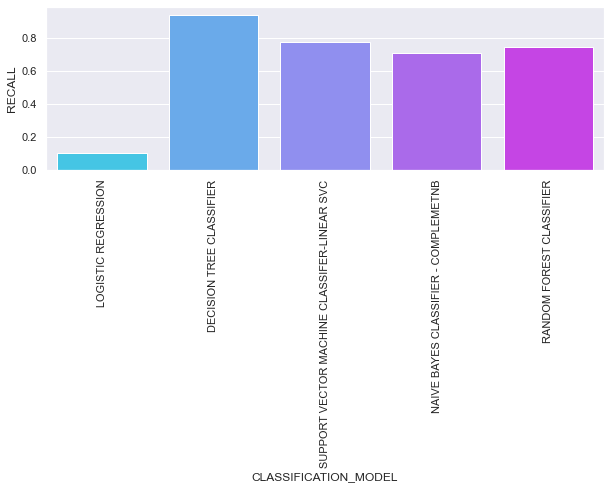

<Figure size 720x216 with 0 Axes>

In [94]:
sns.set(rc={'figure.figsize':(10,3)})
ax = sns.barplot(x='CLASSIFICATION_MODEL',y='RECALL', data=Tunned,palette='cool')
plt.xticks(rotation=90)
plt.figure()

After the parameter tunning we are observing great enhancement for all models as you can see above. 

<br>

The best parameter model with recall score is **Decision Tree Classifier** with **Recall score : 0.94** which is 0.17 higher than closest model Linear SVC

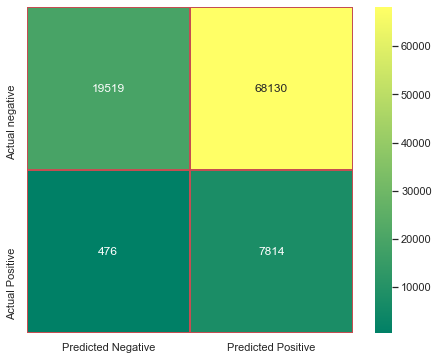

In [67]:


sns.heatmap(confusion_matrix(y_test, Tree_clf.predict(X_test)), annot=True, cmap='summer', cbar=True, linewidths=1, linecolor='r', square=True, yticklabels = ['Actual negative','Actual Positive'] , xticklabels=['Predicted Negative','Predicted Positive'],fmt='g')
plt.show()

As we can see we decrease the False negative numbers as much as possible. We achieve lowest 476 patients missed out of 8290 real hearth disease patients which is **5.74%** missed people with real hearth disease which we are hoping that Doctors will examine and detect these False Negative patients conditions in addition our alert

# Discussion

#### Strengths and Limitations : 

- we encounter several strengths while working this data set. 
            
     **1.st** : Because our data set is inbalanced, we used ML algorithms which works better with inbalanced data                   sets such as ComplementNB version of Naive Bayes that has embedded smoothing parameter.                             Also we used robust scaling inorder to achieve better solutions with inbalance problem. 
     
     **2.nd** : Because there are several outliers in few numerical type columns, we used scaling for every                         machine learning data set 
     
     **3.rd** : Because we have a lot of categorical features, we required to dummyfy all these columns
            
     **4th**  : Because our data set is made over 300,000+ rows, it is hard to work several machine learning                       algorithms. In order to avoid too long training times, we used ML classifiers (such as LinearSVC a                 form of SVM works better with big data sets) which works faster with big data sets. In addition to that, instead of using gridsearchCV we used **RandomizedSearchCV** which works faster with big data sets thanks to its randomized algortihm. 
     
     
